# Assignment 3: EDA, Visualization, Regular Expressions, and SQL
## Due Date: Sunday, Oct. 31, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.

## Scoring Breakdown

|Question|Points|
|---|---|
|1.1|10|
|1.2|10|
|1.3|10|
|1.4|10|
|2|30|
|3.1|10|
|3.2|10|
|3.3|10|
|**Total**|100|

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [ ]:
import pandas as pd
import numpy as np
bus = pd.read_csv('bus.csv')
ins = pd.read_csv('ins.csv')
ins2vio = pd.read_csv('ins2vio.csv')
vio = pd.read_csv('vio.csv')

## Part 1: EDA

Use the business dataset (bus) to answer the Part 1 questions.

1.1. Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.


In [ ]:
bid = bus['business id column'].value_counts().to_frame() # used value_counts() to find duplicates
bid[(bid['business id column'] != 1)]

,business id column


1.2. In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 5 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 5 addressses where businesses are located, from most popular to least popular.

Hint: you may find `value_counts()` helpful.

In [ ]:
top_names = bus['name'].value_counts().head(5)
top_names = top_names.to_frame().T.columns.to_numpy()
top_names

array(["Peet's Coffee & Tea", 'Starbucks Coffee', 'Jamba Juice',
       "McDonald's", 'STARBUCKS'], dtype=object)

In [ ]:
top_addresses = bus['address'].value_counts().head(5).iloc[1:] # removed "Off the Grid" - outlier
top_addresses.to_frame().T.columns.to_numpy()

array(['428 11th St', '2948 Folsom St', '3251 20th Ave', 'Pier 41'],
      dtype=object)

1.3. In the following cell, construct a series that counts the number of businesses at each address that have likely MISSING postal code value (i.e. postal_code=-9999). Order the series in descending order by count.

In [ ]:
missing = bus[bus['postal_code'] == '-9999']
missing['address'].value_counts()

Off The Grid                                         39
Off the Grid                                         10
OTG                                                   4
Approved Locations                                    3
Approved Private Locations                            3
                                                     ..
201 2nd St                                            1
Pier 39 West Perimeter                                1
170 O'Farrell St                                      1
Golden Gate Park, JFK Dr.@Conservatory of Flowers     1
3611 18th St                                          1
Name: address, Length: 135, dtype: int64

1.4. Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

In [ ]:
bus['postal5'] = bus['postal_code'].str[:5]
bus['postal5'].replace({"-9999" : None}, inplace = True)
bus

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,94124
...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,94118
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,94107
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,94102
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,94103


In [ ]:
bus.head(6001).tail(1) #postal5

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
6000,98050,WRECKING BALL COFFEE ROASTERS,88 Colin P. Kelly Junior St,San Francisco,CA,94107,-9999.0,-9999.0,14155718189,94107


In [ ]:
#bus = bus["postal5"].str.find("None")
bus.head(23).tail(1) # first instance of postal5 = "None" when iterating through bus DataFrame

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999,None


## Part 2: Visualization

Using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

2.Create a side-by-side boxplot like what you see in the figure that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

Hint: Consider using appropriate JOIN operations.

![image.png](attachment:34b56649-30c9-452d-8300-a14ffa9a3580.png)

<AxesSubplot:xlabel='year', ylabel='score'>

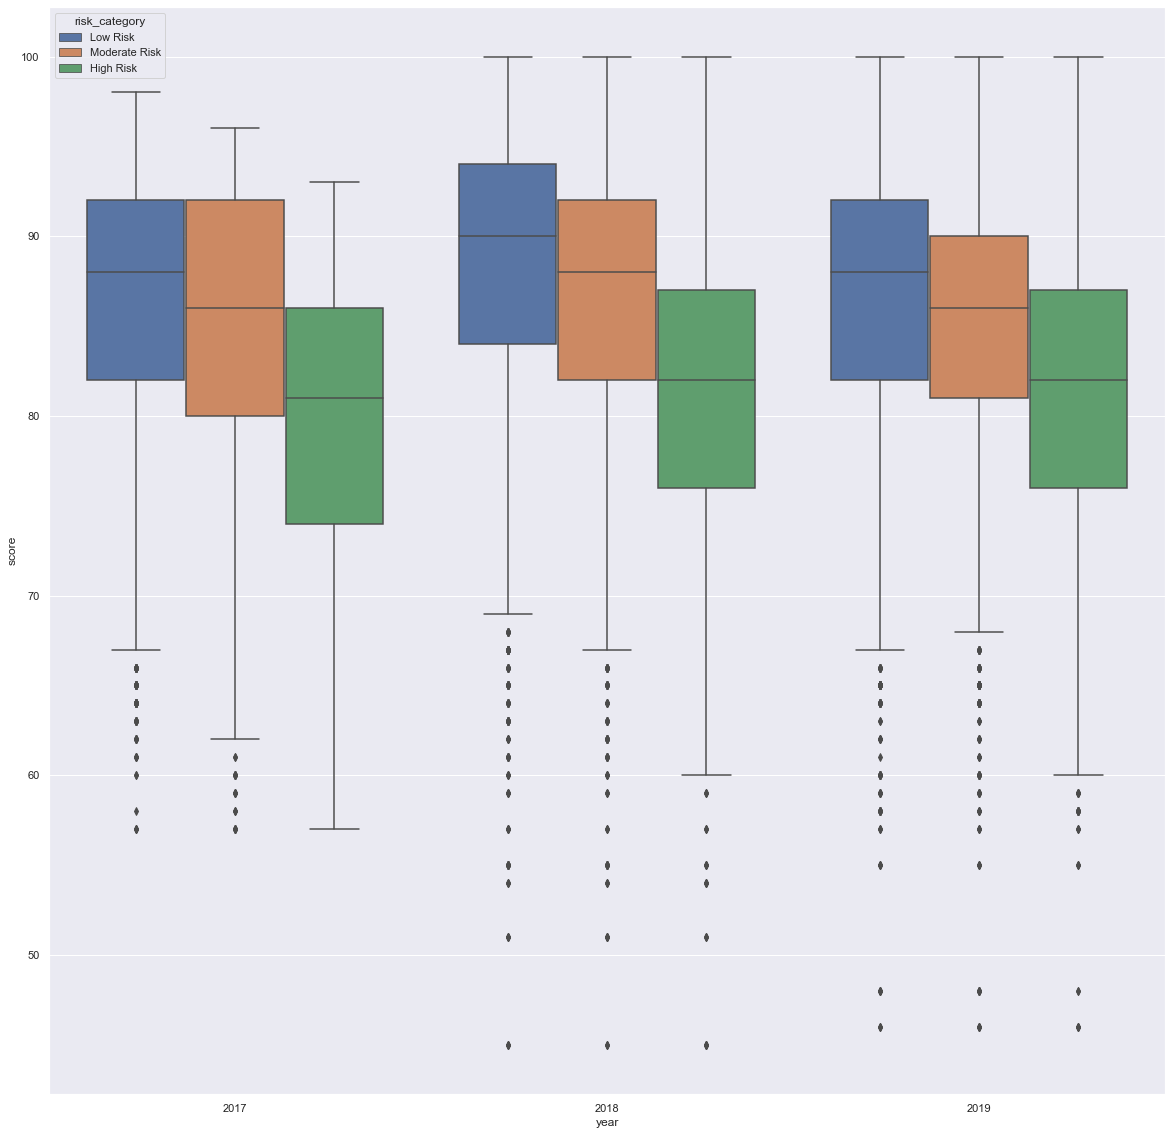

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = pd.merge(vio, ins2vio, how = 'left')
scores = pd.merge(scores, ins, how = 'left')
dataByYear = r'\/(\d{4})\s'
scores['year'] = scores['date'].str.extract(dataByYear)

scores = scores[scores['year'] != '2016'] # 2017-2019
scores['score'] = scores[scores['score'] > 40].score

sns.set(rc = {'figure.figsize':(20, 20)})
sns.boxplot(x = 'year', y = 'score', hue = 'risk_category', data = scores, hue_order = ['Low Risk', 'Moderate Risk', 'High Risk'])

## Part 3: SQL

3.1 Create a database `Cat` with the following schema:

CREATE TABLE owners (

ownerid integer,

name text,

age integer,

PRIMARY KEY (ownerid)

);


CREATE TABLE cats (

catid integer,

owner integer,

name text,

breed text,

age integer,

PRIMARY KEY (catid),

FOREIGN KEY (owner) REFERENCES owners);

In [ ]:
import sqlite3
cat = sqlite3.connect(':memory:')
c = cat.cursor()

c.execute("""
CREATE TABLE owners (
  ownerid integer,
  name text,
  age integer,
  PRIMARY KEY (ownerid)
);
""")

c.execute("""
CREATE TABLE cats (
  catid integer,
  owner integer,
  name text,
  breed text,
  age integer,
  PRIMARY KEY (catid),
  FOREIGN KEY (owner) REFERENCES owners
);
""")

c.execute("""
INSERT INTO owners VALUES
    (0, 'Abe', 30),
    (1, 'Jullana', 20),
    (2, 'Zane', 10);
""")

c.execute("""
INSERT INTO cats VALUES
    (0, 1, 'Genji', 'Devon Rex', 2),
    (1, 1, 'Tiger', 'Tabi', 4),
    (2, 1, 'Mr. Mittens', 'Siamese', 6),
    (3, 1, 'Sphynx', 'Sphynx', 8),
    (4, 1, 'Meowth', 'Mainecoon', 11),
    (5, 1, 'Kit Kat', 'Persian', 15);
""")

cat.commit()

3.2. Write a SQL query that returns the number of cats, over the age of 10, of each
breed of cat.

In [ ]:
count = 0
def print_sql(s):
    for result in c.execute(s):
        global count
        count += 1
        print(result)

query1 = """
  SELECT * FROM cats
  WHERE age > 10
  GROUP BY breed;
"""

print_sql(query1)
print() # line break
print("Number of cats over age 10: " + str(count) + " cats")

(4, 1, 'Meowth', 'Mainecoon', 11)
(5, 1, 'Kit Kat', 'Persian', 15)

Number of cats over age 10: 2 cats


3.3. Write a SQL query that returns the ownerid/owner of the one cat owner who owns
the most cats.

In [ ]:
query2 = """
  SELECT owners.ownerid, owners.name FROM owners
  INNER JOIN cats ON owners.ownerid = cats.owner
  GROUP BY ownerid
  ORDER BY COUNT(*) DESC
  LIMIT 1;
"""
print_sql(query2)

(1, 'Jules')
